## Groupby
판다스의 groupby 함수는 데이터를 그룹화하는 데 사용되며, SQL의 GROUP BY 명령어와 유사합니다. 이 기능을 사용하면, 복잡한 데이터 집합에서 그룹별로 연산을 적용하여 분석을 용이하게 할 수 있습니다.

In [2]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv("실습 파일/gapminder.tsv", sep="\t")
grouped = df.groupby("year")

grouped.groups.keys()

dict_keys([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002, 2007])

In [5]:
idx = grouped.groups[1957]
df.iloc[idx]


,country,continent,year,lifeExp,pop,gdpPercap
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
13,Albania,Europe,1957,59.280,1476505,1942.284244
25,Algeria,Africa,1957,45.685,10270856,3013.976023
37,Angola,Africa,1957,31.999,4561361,3827.940465
49,Argentina,Americas,1957,64.399,19610538,6856.856212
...,...,...,...,...,...,...
1645,Vietnam,Asia,1957,42.887,28998543,676.285448
1657,West Bank and Gaza,Asia,1957,45.671,1070439,1827.067742
1669,"Yemen, Rep.",Asia,1957,33.970,5498090,804.830455
1681,Zambia,Africa,1957,44.077,3016000,1311.956766


<Axes: xlabel='year'>

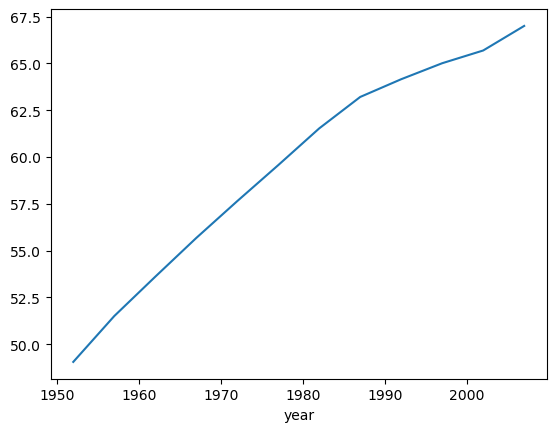

In [6]:
a = df.groupby('year')['lifeExp'].mean()
a.plot()

In [7]:
df.groupby(['year','continent'])['lifeExp'].mean()

year  continent
1952  Africa       39.135500
      Americas     53.279840
      Asia         46.314394
      Europe       64.408500
      Oceania      69.255000
1957  Africa       41.266346
      Americas     55.960280
      Asia         49.318544
      Europe       66.703067
      Oceania      70.295000
1962  Africa       43.319442
      Americas     58.398760
      Asia         51.563223
      Europe       68.539233
      Oceania      71.085000
1967  Africa       45.334538
      Americas     60.410920
      Asia         54.663640
      Europe       69.737600
      Oceania      71.310000
1972  Africa       47.450942
      Americas     62.394920
      Asia         57.319269
      Europe       70.775033
      Oceania      71.910000
1977  Africa       49.580423
      Americas     64.391560
      Asia         59.610556
      Europe       71.937767
      Oceania      72.855000
1982  Africa       51.592865
      Americas     66.228840
      Asia         62.617939
      Europe       72.80640

In [8]:

# 대륙별로 국각가 몇개있는지?
#count : 중복 허용
#nunique : 중복 불가
df.groupby('continent')['country'].nunique()

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64

In [10]:
df.country.unique

<bound method Series.unique of 0       Afghanistan
1       Afghanistan
2       Afghanistan
3       Afghanistan
4       Afghanistan
           ...     
1699       Zimbabwe
1700       Zimbabwe
1701       Zimbabwe
1702       Zimbabwe
1703       Zimbabwe
Name: country, Length: 1704, dtype: object>

In [11]:
df.groupby('year')[['lifeExp','pop','gdpPercap']].mean()

,lifeExp,pop,gdpPercap
year,,,
1952,49.057620,1.695040e+07,3725.276046
1957,51.507401,1.876341e+07,4299.408345
1962,53.609249,2.042101e+07,4725.812342
1967,55.678290,2.265830e+07,5483.653047
1972,57.647386,2.518998e+07,6770.082815
1977,59.570157,2.767638e+07,7313.166421
1982,61.533197,3.020730e+07,7518.901673
1987,63.212613,3.303857e+07,7900.920218
1992,64.160338,3.599092e+07,8158.608521


In [12]:
# 기대수명(평균), 인구수(최대값), 1인당 gdp(중앙값)
df.groupby('year').agg({'lifeExp':['mean'],'pop':['max','min'],'gdpPercap':['median']})

lifeExp         pop            gdpPercap
           mean         max     min       median
year                                            
1952  49.057620   556263527   60011  1968.528344
1957  51.507401   637408000   61325  2173.220291
1962  53.609249   665770000   65345  2335.439533
1967  55.678290   754550000   70787  2678.334740
1972  57.647386   862030000   76595  3339.129407
1977  59.570157   943455000   86796  3798.609244
1982  61.533197  1000281000   98593  4216.228428
1987  63.212613  1084035000  110812  4280.300366
1992  64.160338  1164970000  125911  4386.085502
1997  65.014676  1230075000  145608  4781.825478
2002  65.694923  1280400000  170372  5319.804524
2007  67.007423  1318683096  199579  6124.371108

In [14]:
#연도별로 1인당 GDP 가장 높았던 나라
idx=df.groupby('year')['gdpPercap'].idxmax()

In [15]:
df.loc[idx][['year','country','gdpPercap']]



,year,country,gdpPercap
852,1952,Kuwait,108382.35290
853,1957,Kuwait,113523.13290
854,1962,Kuwait,95458.11176
855,1967,Kuwait,80894.88326
856,1972,Kuwait,109347.86700
857,1977,Kuwait,59265.47714
1314,1982,Saudi Arabia,33693.17525
1147,1987,Norway,31540.97480
860,1992,Kuwait,34932.91959
1149,1997,Norway,41283.16433


In [16]:
#연도별로 인구수의 최대값-최소값
df.groupby('year')['pop'].apply(lambda x : x.max()-x.min())


year
1952     556203516
1957     637346675
1962     665704655
1967     754479213
1972     861953405
1977     943368204
1982    1000182407
1987    1083924188
1992    1164844089
1997    1229929392
2002    1280229628
2007    1318483517
Name: pop, dtype: int64

In [17]:
# 연도별로 기대수명의 평균이 60이상인 나라들만 필터링
df.groupby('year').filter(lambda x:x['lifeExp'].mean()>=60)

,country,continent,year,lifeExp,pop,gdpPercap
6,Afghanistan,Asia,1982,39.854,12881816,978.011439
7,Afghanistan,Asia,1987,40.822,13867957,852.395945
8,Afghanistan,Asia,1992,41.674,16317921,649.341395
9,Afghanistan,Asia,1997,41.763,22227415,635.341351
10,Afghanistan,Asia,2002,42.129,25268405,726.734055
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


### 연습문제
1. 'continent' 열을 기준으로 데이터를 그룹화하고, 각 대륙별 'lifeExp'의 평균을 계산하세요.

In [20]:
df.groupby('continent')[['lifeExp']].mean()

,lifeExp
continent,
Africa,48.865330
Americas,64.658737
Asia,60.064903
Europe,71.903686
Oceania,74.326208


2. 'year' 열을 기준으로 데이터를 그룹화하고, 각 연도별 'gdpPercap'의 중간값을 계산하세요.

In [21]:
df.groupby('year')[['gdpPercap']].median()

,gdpPercap
year,
1952,1968.528344
1957,2173.220291
1962,2335.439533
1967,2678.334740
1972,3339.129407
1977,3798.609244
1982,4216.228428
1987,4280.300366
1992,4386.085502


3. 'continent'와 'year'를 기준으로 데이터를 그룹화하고, 각 그룹의 'pop' 합계를 계산하세요.

In [22]:
df.groupby(['continent','year'])[['pop']].sum()

pop
continent year            
Africa    1952   237640501
          1957   264837738
          1962   296516865
          1967   335289489
          1972   379879541
          1977   433061021
          1982   499348587
          1987   574834110
          1992   659081517
          1997   743832984
          2002   833723916
          2007   929539692
Americas  1952   345152446
          1957   386953916
          1962   433270254
          1967   480746623
          1972   529384210
          1977   578067699
          1982   630290920
          1987   682753971
          1992   739274104
          1997   796900410
          2002   849772762
          2007   898871184
Asia      1952  1395357351
          1957  1562780599
          1962  1696357182
          1967  1905662900
          1972  2150972248
          1977  2384513556
          1982  2610135582
          1987  2871220762
          1992  3133292191
          1997  3383285500
          2002  3601802203
          2007  3811953827
Europe    1952   418120846
          1957   437890351
          1962   460355155
          1967   481178958
          1972   500635059
          1977   517164531
          1982   531266901
          1987   543094160
          1992   558142797
          1997   568944148
          2002   578223869
          2007   586098529
Oceania   1952    10686006
          1957    11941976
          1962    13283518
          1967    14600414
          1972    16106100
          1977    17239000
          1982    18394850
          1987    19574415
          1992    20919651
          1997    22241430
          2002    23454829
          2007    24549947

4. 'country' 열을 기준으로 데이터를 그룹화하고, 각 국가의 'lifeExp', 'gdpPercap', 'pop'에 대한 평균, 최대값, 최소값을 계산하세요.

In [48]:
df.groupby('country')[['lifeExp','gdpPercap','pop']].agg(['mean','max','min'])

lifeExp                    gdpPercap                \
                         mean     max     min         mean           max   
country                                                                    
Afghanistan         37.478833  43.828  28.801   802.674598    978.011439   
Albania             68.432917  76.423  55.230  3255.366633   5937.029526   
Algeria             59.030167  72.301  43.077  4426.025973   6223.367465   
Angola              37.883500  42.731  30.015  3607.100529   5522.776375   
Argentina           69.060417  75.320  62.485  8955.553783  12779.379640   
...                       ...     ...     ...          ...           ...   
Vietnam             57.479500  74.249  40.412  1017.712615   2441.576404   
West Bank and Gaza  60.328667  73.422  43.160  3759.996781   7110.667619   
Yemen, Rep.         46.780417  62.698  32.548  1569.274672   2280.769906   
Zambia              45.996333  51.821  39.193  1358.199409   1777.077318   
Zimbabwe            52.663167  62.351  39.989   635.858042    799.362176   

                                          pop                      
                            min          mean       max       min  
country                                                            
Afghanistan          635.341351  1.582372e+07  31889923   8425333  
Albania             1601.056136  2.580249e+06   3600523   1282697  
Algeria             2449.008185  1.987541e+07  33333216   9279525  
Angola              2277.140884  7.309390e+06  12420476   4232095  
Argentina           5911.315053  2.860224e+07  40301927  17876956  
...                         ...           ...       ...       ...  
Vietnam              605.066492  5.456857e+07  85262356  26246839  
West Bank and Gaza  1515.592329  1.848606e+06   4018332   1030585  
Yemen, Rep.          781.717576  1.084319e+07  22211743   4963829  
Zambia              1071.353818  6.353805e+06  11746035   2672000  
Zimbabwe             406.884115  7.641966e+06  12311143   3080907  

[142 rows x 9 columns]

5. 각 국가별로 'lifeExp' 열의 최대값과 최소값의 차이를 계산하세요.

In [49]:
df.groupby('country')[['lifeExp']].apply(lambda x: x.max()-x.min())

,lifeExp
country,
Afghanistan,15.027
Albania,21.193
Algeria,29.224
Angola,12.716
Argentina,12.835
...,...
Vietnam,33.837
West Bank and Gaza,30.262
"Yemen, Rep.",30.150


6. 'continent' 열을 기준으로 데이터를 그룹화하고, 각 대륙에서 'lifeExp'가 가장 높은 국가의 이름을 찾으세요.

In [60]:
idx = df.groupby('continent')['lifeExp'].idxmax()
df.loc[idx][['continent','country','lifeExp']]

df.loc[idx,['continent','country','lifeExp']]

,continent,country,lifeExp
1271,Africa,Reunion,76.442
251,Americas,Canada,80.653
803,Asia,Japan,82.603
695,Europe,Iceland,81.757
71,Oceania,Australia,81.235


7. 각 국가별로 'lifeExp'가 처음으로 70을 넘은 연도를 찾으세요.

In [59]:
df[df['lifeExp']>70].groupby('country')['year'].min()

country
Albania               1982
Algeria               2002
Argentina             1987
Australia             1957
Austria               1967
                      ... 
United States         1962
Uruguay               1982
Venezuela             1987
Vietnam               1997
West Bank and Gaza    1997
Name: year, Length: 84, dtype: int64

8. 'continent'를 기준으로 그룹화한 후, 각 대륙에서 'country'의 수가 5개 이하인 대륙만을 필터링하세요.

In [64]:
df.groupby('continent').filter(lambda x: x['country'].nunique()<=5)
df.groupby('continent').filter(lambda x: len(x['country'].unique())<=5)

,country,continent,year,lifeExp,pop,gdpPercap
60,Australia,Oceania,1952,69.120,8691212,10039.59564
61,Australia,Oceania,1957,70.330,9712569,10949.64959
62,Australia,Oceania,1962,70.930,10794968,12217.22686
63,Australia,Oceania,1967,71.100,11872264,14526.12465
64,Australia,Oceania,1972,71.930,13177000,16788.62948
65,Australia,Oceania,1977,73.490,14074100,18334.19751
66,Australia,Oceania,1982,74.740,15184200,19477.00928
67,Australia,Oceania,1987,76.320,16257249,21888.88903
68,Australia,Oceania,1992,77.560,17481977,23424.76683
69,Australia,Oceania,1997,78.830,18565243,26997.93657
